# Bayesian Credible interval

Once the posterior distribution $P(\mu)$ is obtained (by marginalising over the nuisance parameters $\eta$, a Bayesian can quote a $(100\times\alpha)$\% \emph{credible interval} (or credible region in more than one dimension), as a region $\mu\in\Omega_{\alpha}$ for which,

$$
    P(\mu\in\Omega_{\alpha})=\int_{\Omega_{\alpha}} P(\mu)d\mu = \alpha.
$$

Most of our functions we need are already saved in `counting_model_functions.py` so we'll import those, and calculate the posterior distribution again. 

In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

from counting_model import *
from counting_model_functions import *

xaxis = numpy.linspace(0.,25,200)

normalise = norm(n)
# plot the posterior
p_mu = [ integral(mu,n)/normalise for mu in xaxis ]

There can be multiple such regions, any of which satisfy this equation. Below is an example which finds the *shortest* such interval. 

68.3% interval (0.38,7.54)


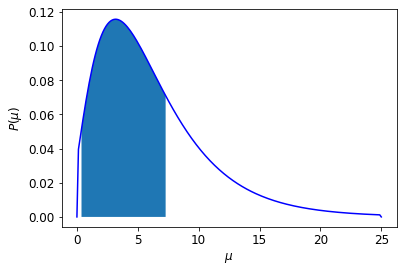

In [2]:
# use an approximate for the integral with rectangles
intervals=[]
for i in range(len(xaxis)):
 x = xaxis[i]
 if x > 5: break
 inte=0
 for j in range(i,len(xaxis)-1):
   y = xaxis[j+1]
   yl = xaxis[j]
   inte += p_mu[j]*(y-yl)
   if inte >= 0.683:
    intervals.append([y-x,[x,y],[i,j]])
    break

# find the shortest one
intervals.sort(); interval = intervals[0]
print("68.3%% interval (%.2f,%.2f)"%(interval[1][0],interval[1][1]))

# plot as a shaded region
i=interval[2][0]; j=interval[2][1]
plt.plot(xaxis,p_mu,color='blue')
plt.fill_between(xaxis[i:j],p_mu[i:j])
plt.xlabel("$\\mu$")
plt.ylabel("$P(\mu)$")
plt.savefig("credible_interval.pdf")
plt.show()